In [1]:
# Imports

import pandas as pd
import numpy as np
import pprint
from scipy.stats import norm

In [2]:
def distance_matrix(dist_func, data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    dist_matrix = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            dist_matrix[i, j] = dist_func(data1.iloc[i], data2.iloc[j])
    np.set_printoptions(precision=2)
    print(dist_matrix)
    return dist_matrix

In [25]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def hamming_distance(x1, x2):
    return np.sum(x1 != x2)

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))


def jaccard_distance(x1, x2):
    x1 = set(x1)
    x2 = set(x2)
    intersection = len(x1.intersection(x2))
    union = len(x1.union(x2))
    return 1 - (intersection/union)

def weighted_hamming_distance(x1, x2):
    w1 = 0.6
    w2 = 0.4
    return w1*(x1[0]!=x2[0]) + w2*(x1[1]!=x2[1])

def modified_hamming_distance(x1, x2):
    return (x1[0]!=x2[0])
'''
def eskin_distance(x1, x2):
    ##*
'''

'\ndef eskin_distance(x1, x2):\n    ##*\n'

In [26]:
jaccard_distance(['A', 0], ['A', 1])

0.6666666666666667

In [4]:
data = {
    'Observation': ['$x_{1}$', '$x_{2}$', '$x_{3}$', '$x_{4}$', '$x_{5}$', '$x_{6}$', '$x_{7}$', '$x_{8}$'],
    'Feature_1': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'B'],
    'Feature_2': [0, 1, 1, 0, 0, 0, 1, 1],
    'Class': [1, 1, 1, 1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
df

,Observation,Feature_1,Feature_2,Class
0,$x_{1}$,A,0,1
1,$x_{2}$,B,1,1
2,$x_{3}$,A,1,1
3,$x_{4}$,A,0,1
4,$x_{5}$,B,0,0
5,$x_{6}$,B,0,0
6,$x_{7}$,A,1,0
7,$x_{8}$,B,1,0


In [5]:
df['Feature_1_bin']=df['Feature_1'].apply(lambda x: 1 if x=='A' else 0)

In [6]:
df

,Observation,Feature_1,Feature_2,Class,Feature_1_bin
0,$x_{1}$,A,0,1,1
1,$x_{2}$,B,1,1,0
2,$x_{3}$,A,1,1,1
3,$x_{4}$,A,0,1,1
4,$x_{5}$,B,0,0,0
5,$x_{6}$,B,0,0,0
6,$x_{7}$,A,1,0,1
7,$x_{8}$,B,1,0,0


0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: Class, dtype: int64 [1 0 1 1 0 0 1 0]


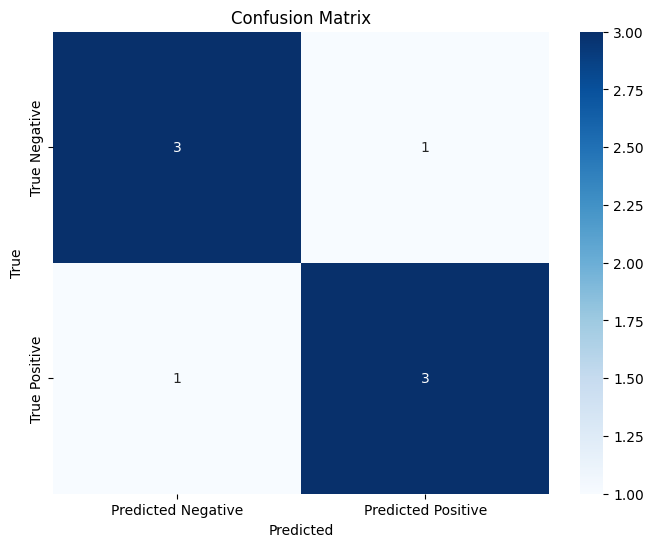

In [32]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='precomputed')

# Fit the classifier to the data
X = df[['Feature_1', 'Feature_2']]
y = df['Class']

#mat = distance_matrix(weighted_hamming_distance,X,X)
knn.fit(mat2, y)
# Predict the class labels for the provided data
y_pred = knn.predict(mat2)

print(y, y_pred)
# Generate the confusion matrix
cm = confusion_matrix(y, y_pred)
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
mat2 = distance_matrix(jaccard_distance,X,X)

[[0.   1.   0.67 0.   0.67 0.67 0.67 1.  ]
 [1.   0.   0.67 1.   0.67 0.67 0.67 0.  ]
 [0.67 0.67 0.   0.67 1.   1.   0.   0.67]
 [0.   1.   0.67 0.   0.67 0.67 0.67 1.  ]
 [0.67 0.67 1.   0.67 0.   0.   1.   0.67]
 [0.67 0.67 1.   0.67 0.   0.   1.   0.67]
 [0.67 0.67 0.   0.67 1.   1.   0.   0.67]
 [1.   0.   0.67 1.   0.67 0.67 0.67 0.  ]]


In [9]:
X_bin = df[['Feature_1_bin', 'Feature_2']]
df['Feature_1_bin'] = df['Feature_1_bin'].apply(lambda x: 0 if x == 1 else 1)


In [10]:
mat3 = distance_matrix(euclidean_distance, X_bin, X_bin)

[[0.   1.41 1.   0.   1.   1.   1.   1.41]
 [1.41 0.   1.   1.41 1.   1.   1.   0.  ]
 [1.   1.   0.   1.   1.41 1.41 0.   1.  ]
 [0.   1.41 1.   0.   1.   1.   1.   1.41]
 [1.   1.   1.41 1.   0.   0.   1.41 1.  ]
 [1.   1.   1.41 1.   0.   0.   1.41 1.  ]
 [1.   1.   0.   1.   1.41 1.41 0.   1.  ]
 [1.41 0.   1.   1.41 1.   1.   1.   0.  ]]


In [28]:
X_bin['Feature_1_bin'].apply(lambda x: 1 if x == 0 else 0)

0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Feature_1_bin, dtype: int64

In [13]:
df_bin_features = df.drop(['Observation', 'Feature_2', 'Class'], axis=1)


In [65]:
def distance(dist_func, x1, x2):
    return dist_func(x1, x2)


In [14]:
y3P = np.array([1.1,0.8,0.5,0.9,0.8])
y3N = np.array([1, 0.9,1.2,0.9])
meanP = np.mean(y3P) # Sample mean
stdP = np.std(y3P, ddof=1)  # Sample standard deviation
meanN = np.mean(y3N)  # Sample mean
stdN = np.std(y3N, ddof=1)  # Sample standard deviation
print(meanP, stdP, meanN, stdN)

0.8200000000000001 0.21679483388678802 0.9999999999999999 0.14142135623730948


In [24]:
np.std([1.1,0.8,0.5,0.9,1,0.9,1.2,0.9,0.8], ddof=1)

np.float64(0.19999999999999998)

Class Positive: P(y) = 1.7191
Class Negative: P(y)= 2.197


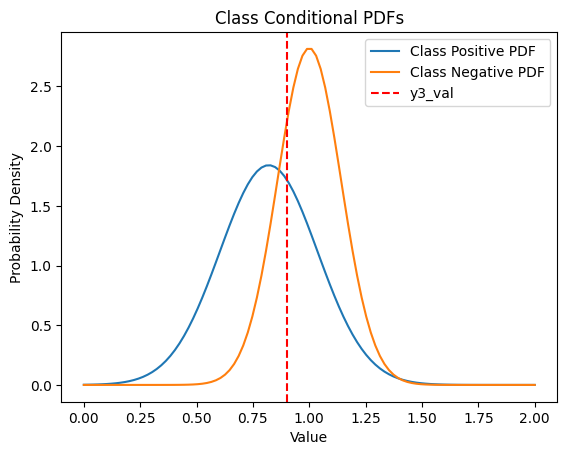

In [23]:
Py3P_obj = norm(meanP, stdP)
Py3N_obj = norm(meanN, stdN)
y3_val = 0.9
Py3P = Py3P_obj.pdf(y3_val)
Py3N = Py3N_obj.pdf(y3_val)
print('Class Positive: P(y) =', round(Py3P, 4))
print('Class Negative: P(y)=', round(Py3N, 4))

# Plot class conditional PDFs
x = np.linspace(0, 2, 100)
plt.plot(x, Py3P_obj.pdf(x), label='Class Positive PDF')
plt.plot(x, Py3N_obj.pdf(x), label='Class Negative PDF')
plt.axvline(y3_val, color='r', linestyle='--', label='y3_val')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Class Conditional PDFs')
plt.legend()
plt.show()